# Building a ML Classifier
For this we have created a Random Forest Classifier

Dataset used have been extracted from: https://archive.ics.uci.edu/ml/datasets/Caesarian+Section+Classification+Dataset

# Mounting GDrive 

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
%cd 'gdrive/MyDrive/IDS Project'

[Errno 2] No such file or directory: 'gdrive/MyDrive/IDS Project'
/content


# Imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn import tree
import joblib
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
from matplotlib import pyplot as plt

# Loading and preprocessing dataset
- Attributes order in dataset: Age, Delivery, Delivery Time, Blood, Heart, Caesarian
- Age contains values: 22,26,28,27,32,36,33,23,20,29,25,37,24,18,30,40,31,19,21,35,17,38
- Delivery means Delivery number and contains values: 1,2,3,4
- Delivery Time and contains values:  0(=timely), 1(=premature), 2(=latecomer)
- Blood means Blood of Pressure and contains values:  0(=low), 1(=normal), 2(=high)
- Heart means Heart Problem and contains values:  0(=apt), 1(=inept)
Caesarian  and contains values:  0(=No), 1(=Yes)
- Caesarian is the class label and rest all are the attributes required to predict class. 

In [ ]:
dataset = pd.read_csv('./Dataset/dataset.csv')
_ = dataset.pop('id')

In [ ]:
dataset.head(100)

,Age,Delivery,Delivery Time,Blood,Heart,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1
...,...,...,...,...,...,...
75,27,2,1,1,0,0
76,33,4,0,1,0,1
77,29,2,1,2,0,1
78,25,1,2,0,0,1


In [ ]:
X_full = dataset.values[:, 0:5]
Y_full = dataset.values[:, 5:6]

# Dataset Analysis

In [ ]:
dataset_copy = dataset.copy()

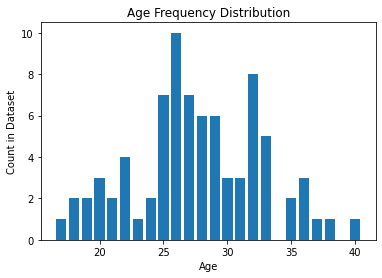

In [ ]:
df1 = dataset_copy['Age'].value_counts()
X_Age = []
Y_Age = []
temp = []
df1_dict = df1.to_dict()
for i in sorted(df1_dict.keys()):
  temp.append(i)
for key in temp:
    X_Age.append(key)
    Y_Age.append(df1_dict[key])
plt.bar(X_Age, Y_Age)
plt.xlabel("Age")
plt.ylabel("Count in Dataset")
plt.title("Age Frequency Distribution")
plt.savefig("./Frequency Distribution/AgeFrequencyDistribution.png")
plt.show()

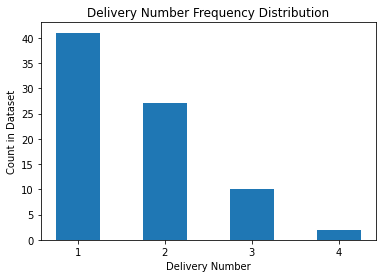

In [ ]:
df1 = dataset_copy['Delivery'].value_counts()
X_Delivery = []
Y_Delivery = []
temp = []
df1_dict = df1.to_dict()
for i in sorted(df1_dict.keys()):
  temp.append(i)
for key in temp:
    X_Delivery.append(f"{key}")
    Y_Delivery.append(df1_dict[key])
plt.bar(X_Delivery, Y_Delivery, width=0.5)
plt.xlabel("Delivery Number")
plt.ylabel("Count in Dataset")
plt.title("Delivery Number Frequency Distribution")
plt.savefig("./Frequency Distribution/DeliveryNumberFrequencyDistribution.png")
plt.show()

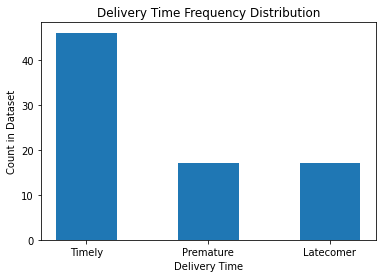

In [ ]:
df1 = dataset_copy['Delivery Time'].value_counts()
X_DT = []
Y_DT = []
temp = []
df1_dict = df1.to_dict()
for i in sorted(df1_dict.keys()):
  temp.append(i)
for key in temp:
    if (key == 0):
      X_DT.append("Timely")
    elif (key == 1):
      X_DT.append("Premature")
    elif (key == 2):
      X_DT.append("Latecomer")
    Y_DT.append(df1_dict[key])
plt.bar(X_DT, Y_DT, width=0.5)
plt.xlabel("Delivery Time")
plt.ylabel("Count in Dataset")
plt.title("Delivery Time Frequency Distribution")
plt.savefig("./Frequency Distribution/DeliveryTimeFrequencyDistribution.png")
plt.show()

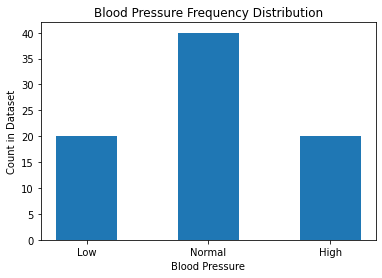

In [ ]:
df1 = dataset_copy['Blood'].value_counts()
X_blood = []
Y_blood = []
temp = []
df1_dict = df1.to_dict()
for i in sorted(df1_dict.keys()):
  temp.append(i)
for key in temp:
    if (key == 0):
      X_blood.append("Low")
    elif (key == 1):
      X_blood.append("Normal")
    elif (key == 2):
      X_blood.append("High")
    Y_blood.append(df1_dict[key])
plt.bar(X_blood, Y_blood, width=0.5)
plt.xlabel("Blood Pressure")
plt.ylabel("Count in Dataset")
plt.title("Blood Pressure Frequency Distribution")
plt.savefig("./Frequency Distribution/BloodPressureFrequencyDistribution.png")
plt.show()

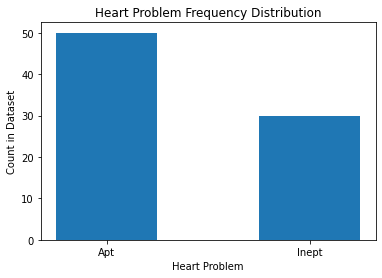

In [ ]:
df1 = dataset_copy['Heart'].value_counts()
X_heart = []
Y_heart = []
temp = []
df1_dict = df1.to_dict()
for i in sorted(df1_dict.keys()):
  temp.append(i)
for key in temp:
    if (key == 0):
      X_heart.append("Apt")
    elif (key == 1):
      X_heart.append("Inept")
    Y_heart.append(df1_dict[key])
plt.bar(X_heart, Y_heart, width=0.5)
plt.xlabel("Heart Problem")
plt.ylabel("Count in Dataset")
plt.title("Heart Problem Frequency Distribution")
plt.savefig("./Frequency Distribution/HeartProblemFrequencyDistribution.png")
plt.show()

# Bootstraping dataset

In [ ]:
def generateDataset(i):
  df1 = dataset.sample(n=len(dataset), replace=True)
  df1_X = df1.copy()
  df_caesarian = df1_X.pop("Caesarian")
  df1_sample = df1_X.sample(n=3, axis='columns')
  df1_sample['Caesarian'] = df_caesarian
  df1_sample.to_csv(f'./Dataset/dataset{i}.csv', header=True, index=False)
  print(f"dataset{i} saved")

In [ ]:
for i in range(0, 5):
  generateDataset(i+1)

dataset1 saved
dataset2 saved
dataset3 saved
dataset4 saved
dataset5 saved


## Result of bootstraping dataset:
Dataset 1 contains attributes: Age, Heart, Delivery

Dataset 2 contains attributes: Delivery, Age, Blood

Dataset 3 contains attributes: Delivery Time, Blood, Heart

Dataset 4 contains attributes: Blood, Age, Heart

Dataset 5 contains attributes: Age, Delivery Time, Heart

# Training 5 Decision Trees

In [ ]:
def trainDT(i, X_train, Y_train, X_test, Y_test, atr_list):
  clf = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5)
  clf = clf.fit(X_train,Y_train)
  Y_pred = clf.predict(X_test)
  print(f"Accuracy score for Dataset numbered {i} is {accuracy_score(Y_test, Y_pred)*100}%")
  joblib.dump(clf, f"./Models/DecisionTree{i}.pkl")
  print(f"DecisionTree{i} model saved")
  dot_data = StringIO()
  export_graphviz(clf, out_file=dot_data,  
                  filled=True, rounded=True,
                  special_characters=True, feature_names=atr_list, class_names=['No','Yes'])
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
  graph.write_png(f'./Graphs/DecisionTree{i}.png')
  Image(graph.create_png())
  print(f"DecisionTree{i} visual saved\n")

In [ ]:
for i in range(0, 5):
  dataset_temp = pd.read_csv(f'./Dataset/dataset{i+1}.csv')
  atr_list = []
  for col in dataset_temp.columns:
    atr_list.append(col)
  atr_list.pop()
  X = dataset_temp.values[:, 0:3]
  Y = dataset_temp.values[:, 3:4]
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
  trainDT(i+1, X_train, Y_train, X_test, Y_test, atr_list)

Accuracy score for Dataset numbered 1 is 70.83333333333334%
DecisionTree1 model saved
DecisionTree1 visual saved

Accuracy score for Dataset numbered 2 is 62.5%
DecisionTree2 model saved
DecisionTree2 visual saved

Accuracy score for Dataset numbered 3 is 70.83333333333334%
DecisionTree3 model saved
DecisionTree3 visual saved

Accuracy score for Dataset numbered 4 is 75.0%
DecisionTree4 model saved
DecisionTree4 visual saved

Accuracy score for Dataset numbered 5 is 58.333333333333336%
DecisionTree5 model saved
DecisionTree5 visual saved



# Bagging Algorithm for classification

In [ ]:
def predictSingle(X):
  result0 = 0
  result1 = 0
  X = [[X[0], X[4], X[1]],
          [X[1], X[0], X[3]],
          [X[2], X[3], X[4]],
          [X[3], X[0], X[4]],
          [X[0], X[2], X[3]]]
  for i in range(0, 5):
    clf = joblib.load(f'./Models/DecisionTree{i+1}.pkl')
    Y = clf.predict([X[i]])
    Y = Y[0]
    if Y == 0:
      result0 += 1
    else:
      result1 += 1
  if result0 > result1:
    return 0
  else:
    return 1

In [ ]:
Y_pred = []
for x in X_full:
  Y_pred.append(predictSingle(x))

In [ ]:
print(f'Accuracy of full dataset using the classifier made is {accuracy_score(Y_full, np.array(Y_pred))*100}%')
print(f'Precision of full dataset using the classifier made is {precision_score(Y_full, np.array(Y_pred))*100}%')
print(f'Recall of full dataset using the classifier made is {recall_score(Y_full, np.array(Y_pred))*100}%')
print(f'F1-Score of full dataset using the classifier made is {f1_score(Y_full, np.array(Y_pred))}')

Accuracy of full dataset using the classifier made is 71.25%
Precision of full dataset using the classifier made is 74.46808510638297%
Recall of full dataset using the classifier made is 76.08695652173914%
F1-Score of full dataset using the classifier made is 0.7526881720430109


In [ ]:
confusionMatrix = confusion_matrix(Y_full,np.array(Y_pred))

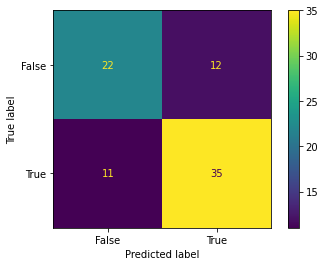

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusionMatrix, display_labels = [False, True])
cm_display.plot()
plt.savefig("ConfusionMatrix.png")
plt.show()